# Description

It takes TWAS results and verifies that the QQ-plots look fine (without inflation).

# Modules

In [1]:
library(tidyverse)

── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
library(qqman)



For example usage please run: vignette('qqman')



Citation appreciated but not required:

Turner, (2018). qqman: an R package for visualizing GWAS results using Q-Q and manhattan plots. Journal of Open Source Software, 3(25), 731, https://doi.org/10.21105/joss.00731.





# Settings

In [3]:
PROJECTS_TRAIT_KEY <- "CHRONOTYPE"

In [4]:
# Parameters
PHENOPLIER_NOTEBOOK_FILEPATH <- "projects/chronotype/nbs/15_twas/10-twas-qqplot.ipynb"

# Paths

In [5]:
BASE_DIR <- Sys.getenv(paste0("PHENOPLIER_PROJECTS_", PROJECTS_TRAIT_KEY, "_RESULTS_DIR"))

In [6]:
BASE_DIR

[1] "/opt/data/projects/chronotype/results"

In [7]:
SPREDIXCAN_DIR <- file.path(BASE_DIR, "twas", "spredixcan")

In [8]:
SPREDIXCAN_DIR

[1] "/opt/data/projects/chronotype/results/twas/spredixcan"

In [9]:
SMULTIXCAN_DIR <- file.path(BASE_DIR, "twas", "smultixcan")

In [10]:
SMULTIXCAN_DIR

[1] "/opt/data/projects/chronotype/results/twas/smultixcan"

# Load trait info file

In [11]:
trait_info <- read_csv(Sys.getenv(paste0("PHENOPLIER_PROJECTS_", PROJECTS_TRAIT_KEY, "_TRAITS_INFO_FILE")), col_names = TRUE)

Rows: 1 Columns: 4
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (2): id, gwas_file
dbl (1): sample_size
lgl (1): n_cases

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [12]:
trait_info

id,gwas_file,sample_size,n_cases
<chr>,<chr>,<dbl>,<lgl>
chronotype,chronotype_raw_BOLT.output_HRC.only_plus.metrics_maf0.001_hwep1em12_info0.3.txt.gz,449734,NA


# Chronotype

In [13]:
gwas_title <- "Chronotype (imputed)"

## S-PrediXcan

### Load data

In [14]:
twas <- as.data.frame(read_csv(file.path(SPREDIXCAN_DIR, "chronotype_raw_BOLT.output_HRC.only_plus.metrics_maf0.001_hwep1em12_info0.3.txt-gtex_v8-mashr-Whole_Blood.csv")))

Rows: 12228 Columns: 14
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (2): gene, gene_name
dbl (8): zscore, pvalue, var_g, n_snps_used, n_snps_in_cov, n_snps_in_model,...
lgl (4): effect_size, pred_perf_r2, pred_perf_pval, pred_perf_qval

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [15]:
dim(twas)

[1] 12228    14

In [16]:
head(twas)

,gene,gene_name,zscore,effect_size,pvalue,var_g,pred_perf_r2,pred_perf_pval,pred_perf_qval,n_snps_used,n_snps_in_cov,n_snps_in_model,best_gwas_p,largest_weight
,<chr>,<chr>,<dbl>,<lgl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSG00000049245.12,VAMP3,10.924968,NA,8.757088e-28,3.926950e-02,NA,NA,NA,4,5,5,1.099995e-21,0.198362785
2,ENSG00000175548.8,ALG10B,10.319145,NA,5.773512e-25,2.721477e-02,NA,NA,NA,2,3,3,1.200001e-24,0.132345346
3,ENSG00000102805.14,CLN5,-9.549758,NA,1.299997e-21,1.358485e-06,NA,NA,NA,1,2,2,1.299997e-21,0.004722521
4,ENSG00000204104.11,TRAF3IP1,-9.483733,NA,2.453452e-21,1.200709e-03,NA,NA,NA,2,2,2,8.199969e-30,0.080102102
5,ENSG00000163125.15,RPRD2,-8.835110,NA,1.000001e-18,4.371313e-03,NA,NA,NA,1,2,2,1.000001e-18,0.096367035
6,ENSG00000132326.11,PER2,8.004452,NA,1.200001e-15,5.228869e-04,NA,NA,NA,1,1,1,1.200001e-15,0.090351372


### QQ-plot

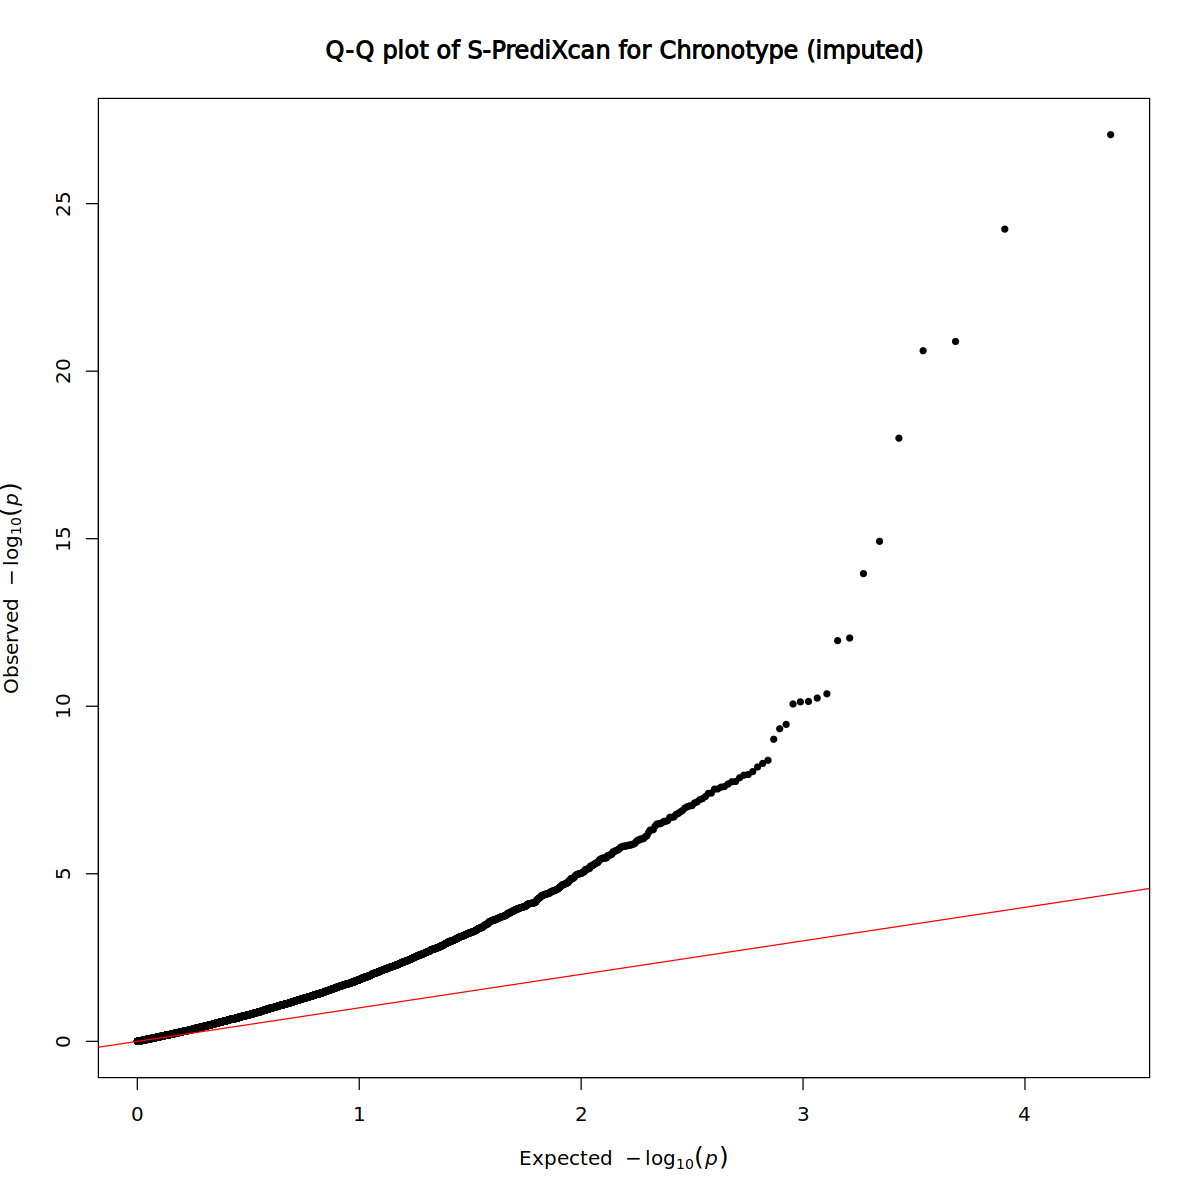

In [17]:
options(repr.plot.width = 10, repr.plot.height = 10)

qq(twas$pvalue, main = paste0("Q-Q plot of S-PrediXcan for ", gwas_title))

## S-MultiXcan

### Load data

In [18]:
twas <- as.data.frame(read_table(file.path(SMULTIXCAN_DIR, "chronotype_raw_BOLT.output_HRC.only_plus.metrics_maf0.001_hwep1em12_info0.3.txt-gtex_v8-mashr-smultixcan.txt")))


── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  gene = col_character(),
  gene_name = col_character(),
  pvalue = col_double(),
  n = col_double(),
  n_indep = col_double(),
  p_i_best = col_double(),
  t_i_best = col_character(),
  p_i_worst = col_double(),
  t_i_worst = col_character(),
  eigen_max = col_double(),
  eigen_min = col_double(),
  eigen_min_kept = col_double(),
  z_min = col_double(),
  z_max = col_double(),
  z_mean = col_double(),
  z_sd = col_double(),
  tmi = col_double(),
  status = col_double()
)



In [19]:
dim(twas)

[1] 22338    18

In [20]:
head(twas)

,gene,gene_name,pvalue,n,n_indep,p_i_best,t_i_best,p_i_worst,t_i_worst,eigen_max,eigen_min,eigen_min_kept,z_min,z_max,z_mean,z_sd,tmi,status
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSG00000143333.6,RGS16,5.800109e-44,38,4,5.700001e-47,Pancreas,0.5800000,Whole_Blood,23.903941,6.335502e-16,0.8775937,-0.5533847,14.393312,9.493750072,5.327872,4,0
2,ENSG00000170667.14,RASA4B,3.372056e-29,28,9,1.476600e-19,Esophagus_Gastroesophageal_Junction,0.9200000,Colon_Transverse,9.079745,6.297973e-16,0.3996185,-4.5335517,9.046474,0.618507928,4.018769,9,0
3,ENSG00000105808.17,RASA4,1.485914e-27,29,7,4.800005e-11,Liver,0.9200000,Adipose_Subcutaneous,17.055960,1.413462e-15,0.7394877,-4.8728495,6.577011,0.828139088,2.685945,7,0
4,ENSG00000175548.8,ALG10B,1.259923e-26,47,5,5.773512e-25,Whole_Blood,0.6700000,Skin_Sun_Exposed_Lower_leg,23.320211,3.628484e-16,0.8153738,-2.1324279,10.319145,4.224470474,4.831721,5,0
5,ENSG00000204104.11,TRAF3IP1,8.160990e-26,48,6,8.199969e-30,Brain_Caudate_basal_ganglia,0.9312093,Colon_Sigmoid,25.088363,6.731142e-16,0.9381543,-9.4837331,11.341213,0.481580645,4.414046,6,0
6,ENSG00000146469.12,VIP,1.298749e-25,20,12,4.799983e-16,Heart_Left_Ventricle,0.9568234,Muscle_Skeletal,3.970554,1.978220e-17,0.2566885,-8.1164551,6.109410,-0.003538853,3.368780,12,0


### QQ-plot

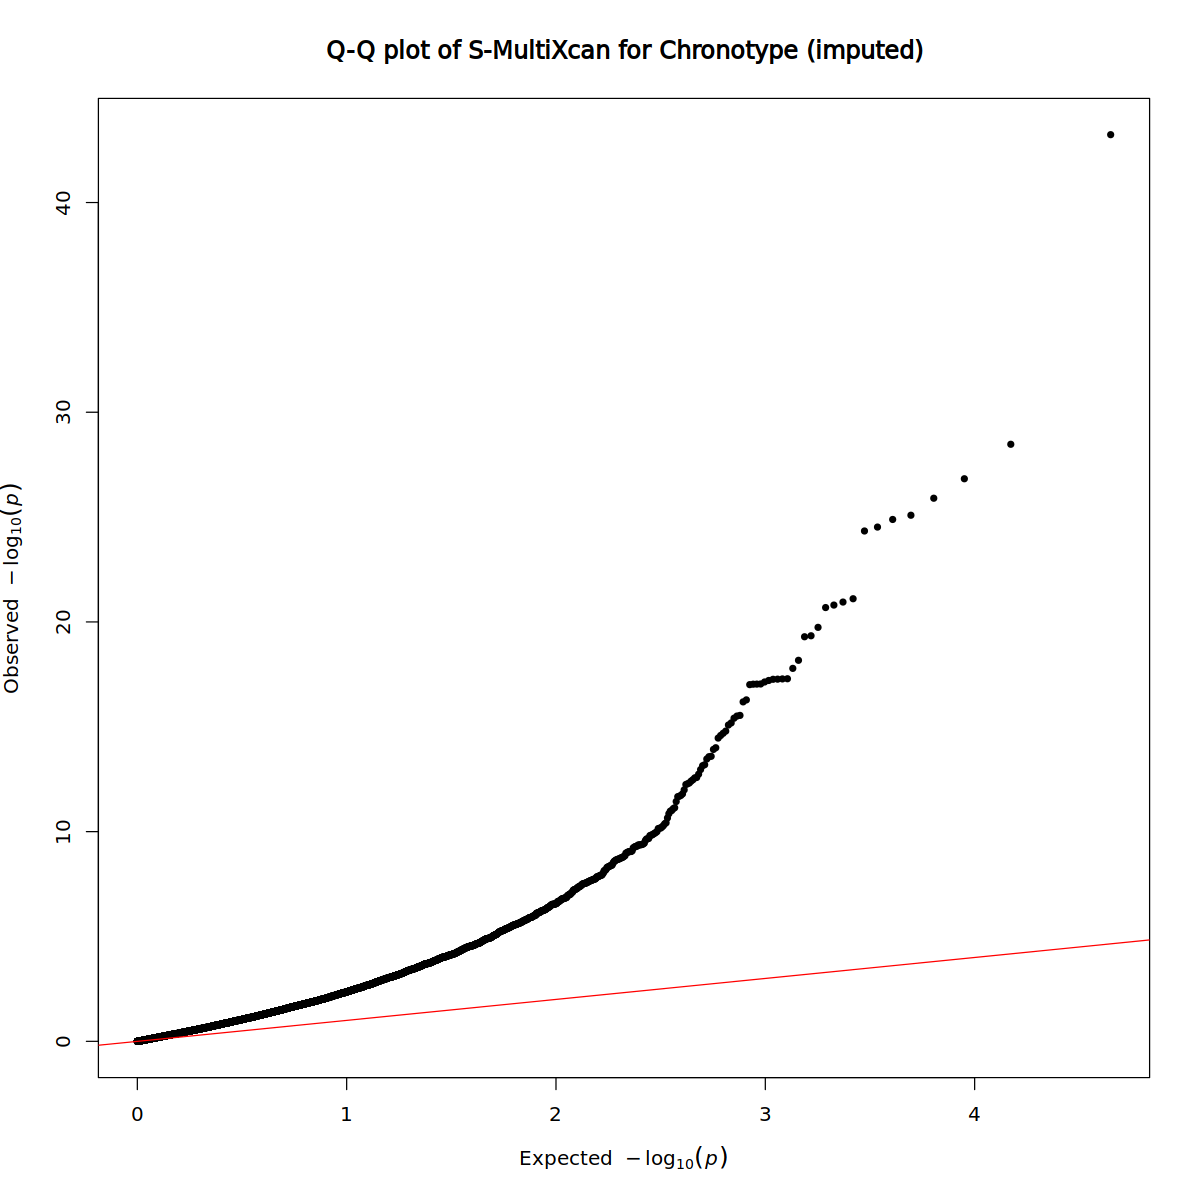

In [21]:
options(repr.plot.width = 10, repr.plot.height = 10)

qq(twas$pvalue, main = paste0("Q-Q plot of S-MultiXcan for ", gwas_title))